# 1_Linear_Regression

In [19]:
import torch
import numpy as np
from torch.autograd import Variable  # Autograd
from torch import nn                 # Basic Neural Network Module
import matplotlib.pyplot as plt      # Needs for Ploting
%matplotlib inline
torch.manual_seed(1)

## Prepare Data

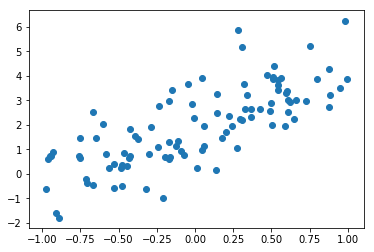

In [20]:
sample_size = 100
x = torch.FloatTensor(sample_size, 1).uniform_(-1, 1)    # sample between [-1, 1], shape=(sample_size,1)
y = 2*x+2 + torch.randn(x.size())                        # noisy y data (tensor), shape=(sample_size, 1)

plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

## Linear Regression Model w/ nn Module

In [21]:
model = nn.Linear(1, 1, bias=True)    # Our linear regression Model XW+b
print(model)                          

model.weight, model.bias              # model object is holding all necessary variables

Linear(in_features=1, out_features=1, bias=True)


(Parameter containing:
 tensor([[ 0.7392]]), Parameter containing:
 tensor([-0.7216]))

In [22]:
cost_func = nn.MSELoss()                                   # Mean squared Cost function 
optimizer = torch.optim.SGD(model.parameters(), lr= 0.05)  # This is SGD Optimizer

### Training Your Model w/ optim Module

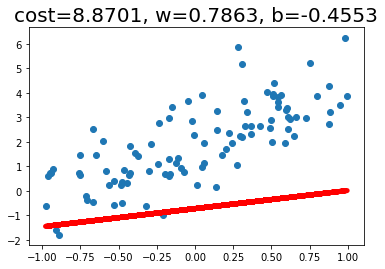

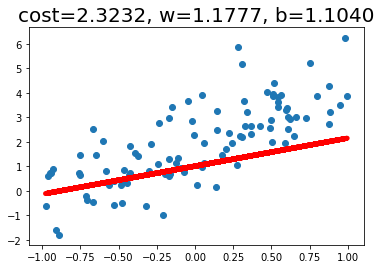

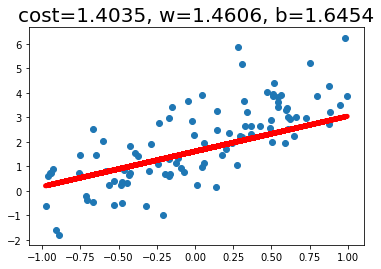

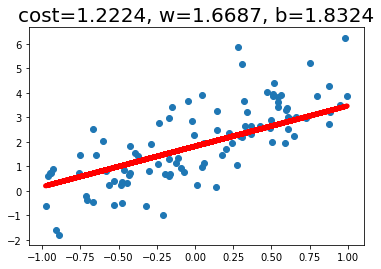

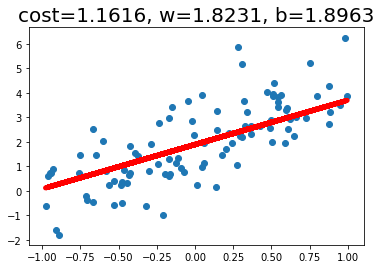

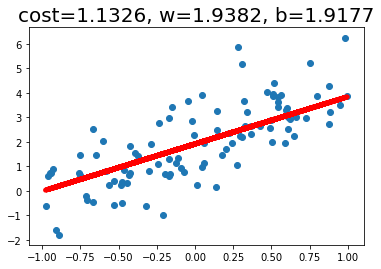

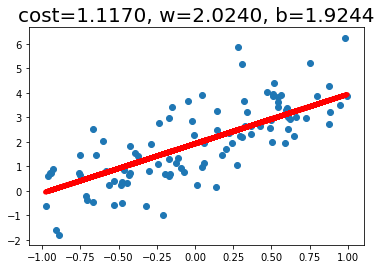

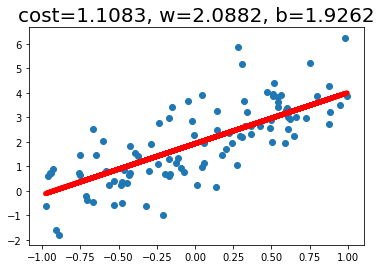

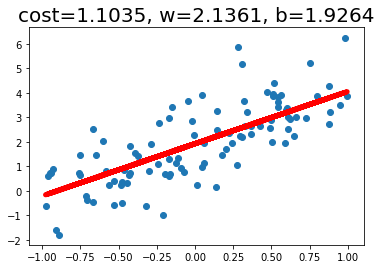

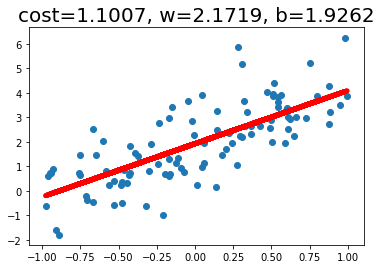

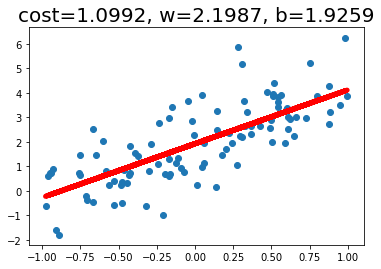

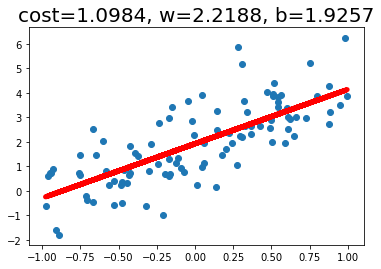

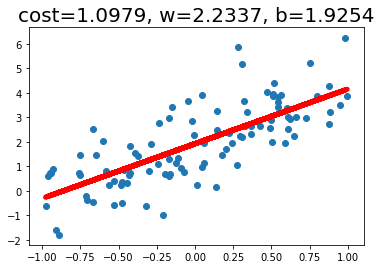

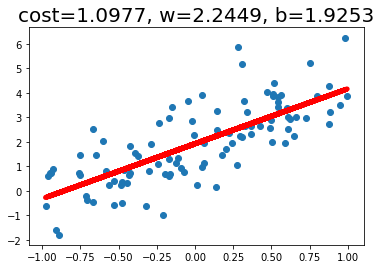

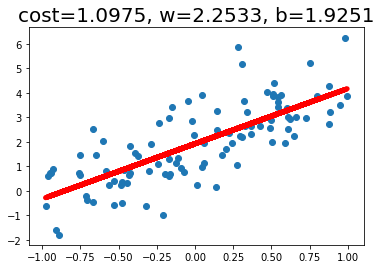

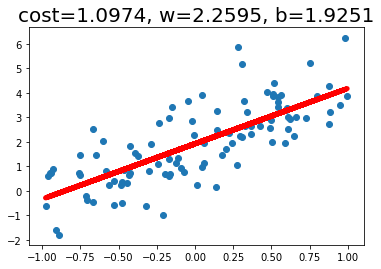

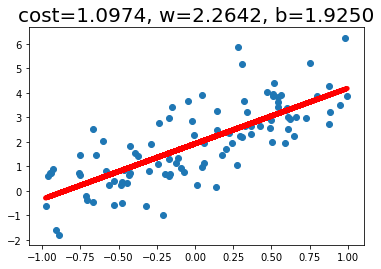

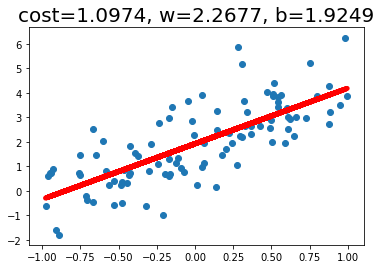

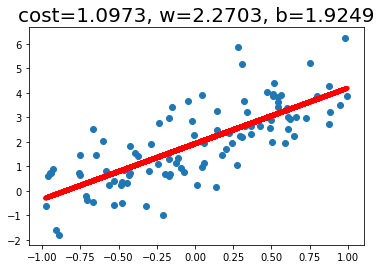

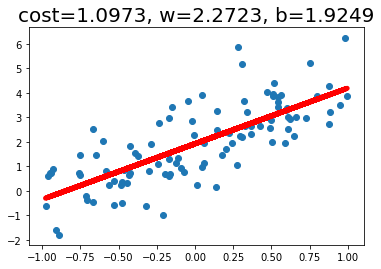

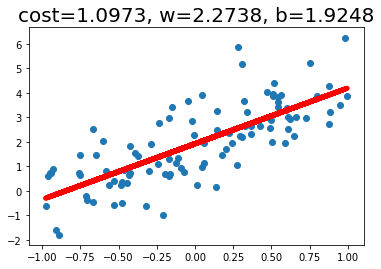

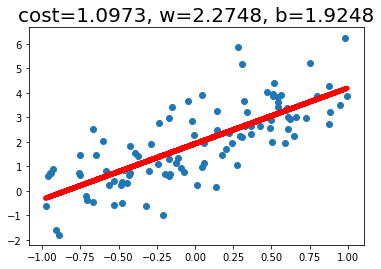

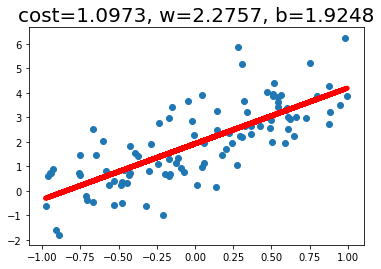

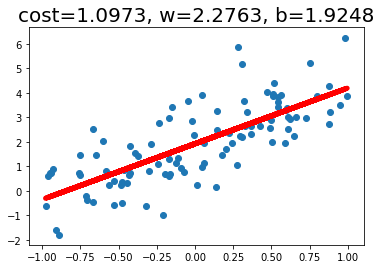

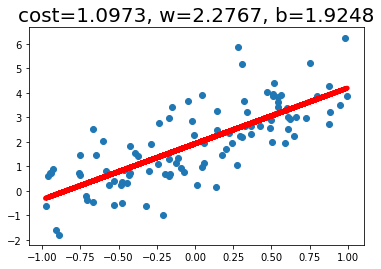

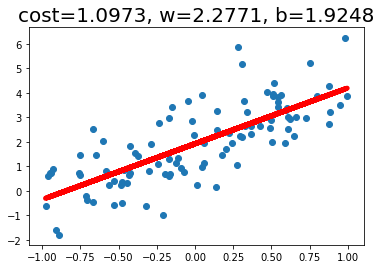

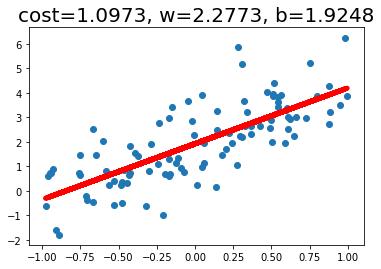

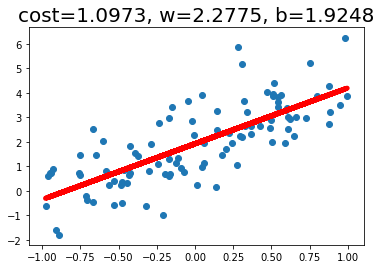

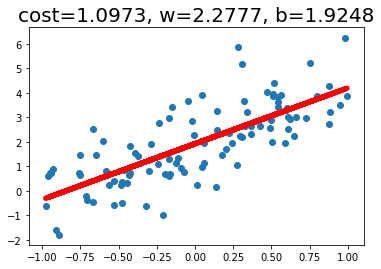

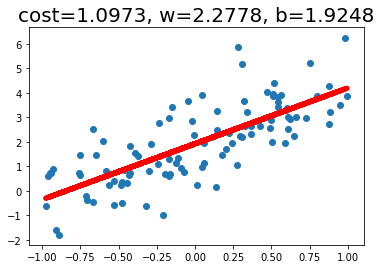

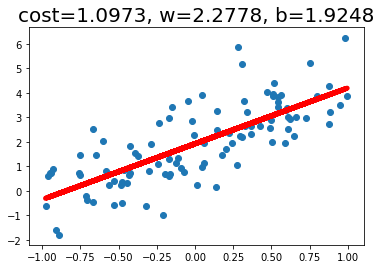

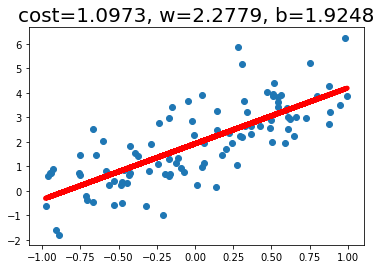

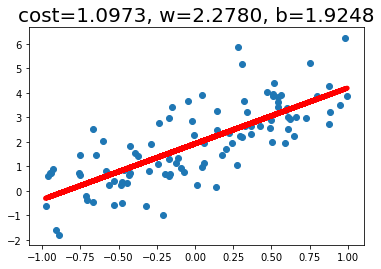

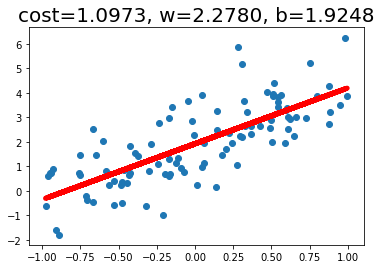

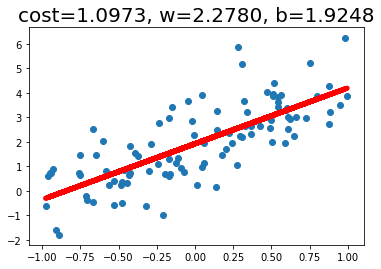

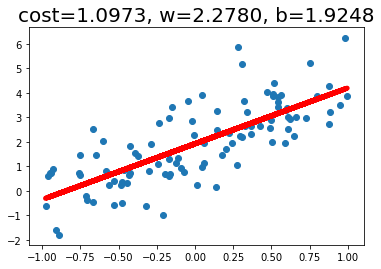

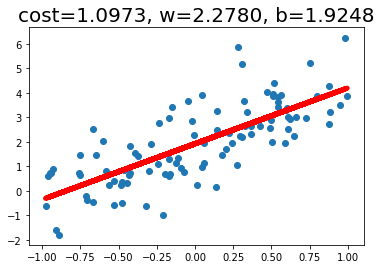

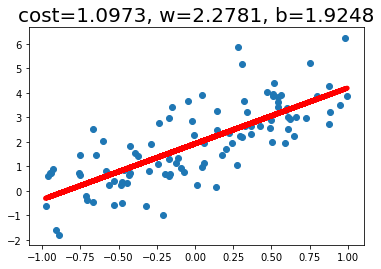

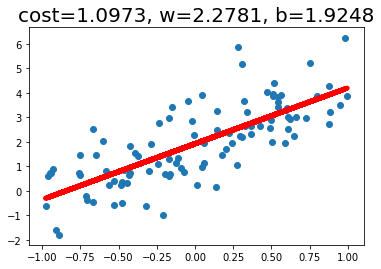

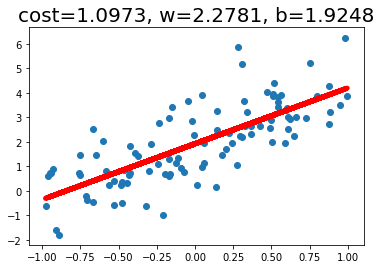

Linear Model Optimization is Done!


In [23]:
plt.ion()   # something about plotting

max_epoch = 400

for step in range(max_epoch):
    
    prediction = model(x)               # input x and predict based on x
    cost = cost_func(prediction, y)     # must be (1. prediction, 2. training target y)
    
    optimizer.zero_grad()               # clear gradients for next traing
    cost.backward()                     # compute gradient value of parameters
    optimizer.step()                    # update gradients !!

    #print ('dL/dw: ', model.weight.grad) 
    #print ('dL/db: ', model.bias.grad)
    
    if step % 10 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.title('cost=%.4f, w=%.4f, b=%.4f' % (cost.item(), model.weight.item(),model.bias.item()), fontdict={'size': 20} )
        plt.show()
        plt.pause(0.1)
        
print('Linear Model Optimization is Done!')

plt.ioff()

In [26]:
model.state_dict()

OrderedDict([('weight', tensor([[ 2.2781]])), ('bias', tensor([ 1.9248]))])

### Prediction (Test)

In [28]:
x_test = torch.Tensor([[1]])
y_test = model(x_test)

print('input: %.4f, output: %.4f' % (x_test.item(), y_test.item()) )

input: 1.0000, output: 4.2028


### Draw Sample from Our Generative Model

In [29]:
x_test = torch.FloatTensor(sample_size, 1).uniform_(-1, 1)    # sample between [-1, 1], shape=(sample_size,1)
y_test = model(x_test) + Variable(torch.randn(x.size()))                # This is our model

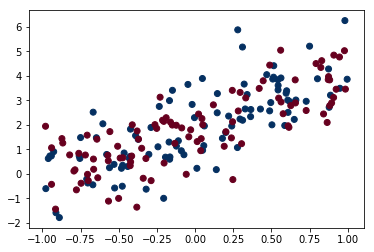

In [30]:
import numpy

plt.scatter(torch.cat((x,x_test)).data.numpy(), torch.cat((y,y_test)).data.numpy(),
           c=numpy.expand_dims(numpy.append(numpy.ones(sample_size), numpy.zeros(sample_size)), axis=1), cmap='RdBu')
plt.show()